# Del dataset del punto 1 realice en PYTHON, cinco algoritmos de preprocesamiento; dos de ellos deben ser `onehotencoder` y otro escalado. Explique por cada uno la razón de su uso.

In [184]:
import numpy as np
import pandas as pd

input_file = "camera_dataset.csv"
df = pd.read_csv(input_file, header = 0)
df = df.replace('', np.nan)
original_headers = list(df.columns.values)
df = df._get_numeric_data()
numeric_headers = list(df.columns.values)
data_numpy = df.to_numpy()
print(data_numpy.shape)
print(data_numpy.dtype)
print(data_numpy)

(1038, 12)
float64
[[1997. 1024.  640. ...  420.   95.  179.]
 [1998. 1280.  640. ...  420.  158.  179.]
 [2000.  640.    0. ...    0.    0.  179.]
 ...
 [2001. 2048. 1024. ...  340.  107.   62.]
 [2001. 2400. 1200. ...  340.  107.   62.]
 [2002. 1600.  800. ...  180.   86.  129.]]


Vemos los indices de los datos perdidos

In [185]:
np.argwhere(np.isnan(data_numpy))

array([[345,   8],
       [345,   9],
       [345,  10],
       [346,   7],
       [346,   8],
       [346,   9],
       [346,  10]], dtype=int64)

## Algoritmo 1: LabelEncoder

Convetimos los valores String en valores numerados crecientes

In [186]:
from sklearn import preprocessing
X = pd.read_csv('camera_dataset.csv')
X.head(0)
X = X.select_dtypes(include=[object])
print(X.shape)
print(X.columns)
le = preprocessing.LabelEncoder()
X_2 = X.apply(le.fit_transform)
X_2.head()
print(X_2)


(1038, 1)
Index(['Model'], dtype='object')
      Model
0         0
1         1
2         2
3         3
4         4
...     ...
1033   1033
1034   1034
1035   1035
1036   1036
1037   1037

[1038 rows x 1 columns]


## Algoritmo 2: OneHotEncoder

Asignamos a cada uno de estos valores una nueva columan con un solo 1

In [187]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_2)
onehotlabels = enc.transform(X_2).toarray()
print(onehotlabels.shape)
print(onehotlabels)
print(onehotlabels.dtype)

(1038, 1038)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
float64


Creamos una lista con los encabezados nuevos y antiguos

In [188]:
df2 = pd.read_csv(input_file, header = 0)
headers = numeric_headers+list(df2['Model'])
print(headers)

['Release date', 'Max resolution', 'Low resolution', 'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range', 'Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions', 'Price', 'Agfa ePhoto 1280', 'Agfa ePhoto 1680', 'Agfa ePhoto CL18', 'Agfa ePhoto CL30', 'Agfa ePhoto CL30 Clik!', 'Agfa ePhoto CL45', 'Agfa ePhoto CL50', 'Canon PowerShot 350', 'Canon PowerShot 600', 'Canon PowerShot A10', 'Canon PowerShot A100', 'Canon PowerShot A20', 'Canon PowerShot A200', 'Canon PowerShot A30', 'Canon PowerShot A300', 'Canon PowerShot A310', 'Canon PowerShot A40', 'Canon PowerShot A400', 'Canon PowerShot A410', 'Canon PowerShot A420', 'Canon PowerShot A430', 'Canon PowerShot A450', 'Canon PowerShot A460', 'Canon PowerShot A5', 'Canon PowerShot A50', 'Canon PowerShot A510', 'Canon PowerShot A520', 'Canon PowerShot A530', 'Canon PowerShot A540', 'Canon PowerShot A550', 'Canon PowerShot A560', 'Canon PowerShot A570 IS', 'Canon PowerShot A5 Zoom', 'Canon PowerS

Juntamos nuestro array con el nuevo array de modelos:

In [189]:
data_numpy=np.concatenate((data_numpy, onehotlabels), axis=1)
np.set_printoptions(suppress=True)
print(data_numpy.shape)
print(data_numpy.dtype)
print(data_numpy)

(1038, 1050)
float64
[[1997. 1024.  640. ...    0.    0.    0.]
 [1998. 1280.  640. ...    0.    0.    0.]
 [2000.  640.    0. ...    0.    0.    0.]
 ...
 [2001. 2048. 1024. ...    1.    0.    0.]
 [2001. 2400. 1200. ...    0.    1.    0.]
 [2002. 1600.  800. ...    0.    0.    1.]]


Comprobamos que nuestro array conserva los mismos valores nan en las mismas posiciones

In [190]:
np.argwhere(np.isnan(data_numpy))

array([[345,   8],
       [345,   9],
       [345,  10],
       [346,   7],
       [346,   8],
       [346,   9],
       [346,  10]], dtype=int64)

Veamos cuales son estos elementos perdidos

In [191]:
print(data_numpy[344:349, 6:12])

[[ 50.  12.  32. 227. 105. 179.]
 [ 50.  10.  nan  nan  nan 179.]
 [ 50.  nan  nan  nan  nan 179.]
 [ 50.   2.   8. 320. 111.  14.]
 [ 50.   2.  16. 320. 111.  14.]]


**NOTA**: Por la naturaleza de nuestro dataset, no podemos aplicar nuevamente un `OneHotEncoder`, por lo cual, lo compensaremos con otros algoritmos de preprocesamiento

Crearemos una función que nos grafique los datos de nuestro dataset para ver que es lo que cambia.

In [192]:
import matplotlib.pyplot as plt
def showDataSet(headers, data):
    for i,col in enumerate(headers[:12]):
        plt.plot(data[:,i])
        print(data[:,i])
        plt.xlabel('Datos')
        plt.ylabel(col)
        plt.grid(True)
        # plt.legend(fontsize=7)
        plt.show()

## Algoritmo 3: Imputer

Este algoritmo rellena los elementos perdidos con la media

In [193]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_numpy = imp_mean.fit_transform(data_numpy)
print(data_numpy)

[[1997. 1024.  640. ...    0.    0.    0.]
 [1998. 1280.  640. ...    0.    0.    0.]
 [2000.  640.    0. ...    0.    0.    0.]
 ...
 [2001. 2048. 1024. ...    1.    0.    0.]
 [2001. 2400. 1200. ...    0.    1.    0.]
 [2002. 1600.  800. ...    0.    0.    1.]]


Veamos como quedaron los elementos perdidos

In [194]:
print(data_numpy[344:349, 6:12])

[[ 50.          12.          32.         227.         105.
  179.        ]
 [ 50.          10.          17.44787645 319.26544402 105.36341699
  179.        ]
 [ 50.           7.78784957  17.44787645 319.26544402 105.36341699
  179.        ]
 [ 50.           2.           8.         320.         111.
   14.        ]
 [ 50.           2.          16.         320.         111.
   14.        ]]


[1997. 1998. 2000. ... 2001. 2001. 2002.]


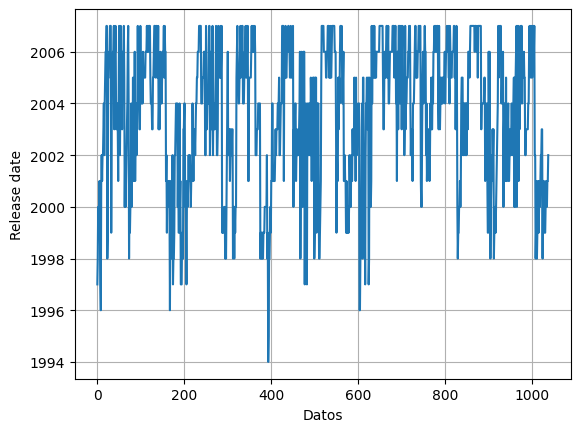

[1024. 1280.  640. ... 2048. 2400. 1600.]


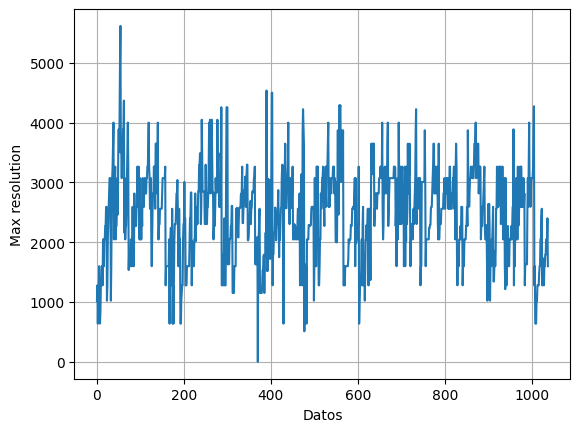

[ 640.  640.    0. ... 1024. 1200.  800.]


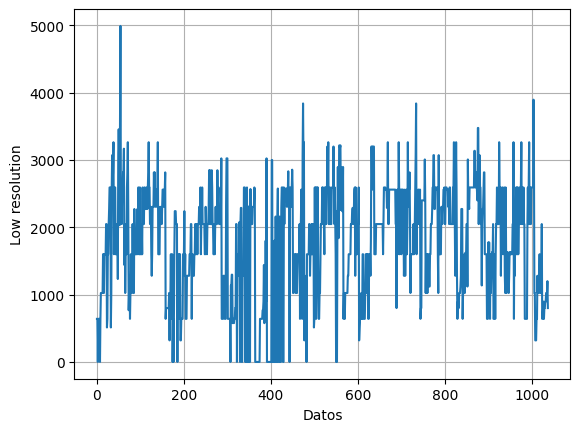

[0. 1. 0. ... 3. 3. 1.]


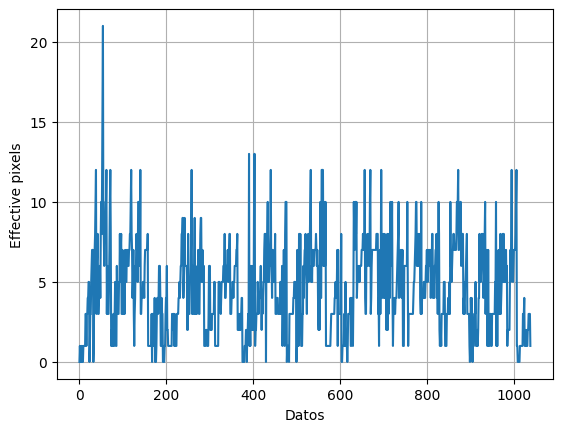

[38. 38. 45. ... 35. 35. 38.]


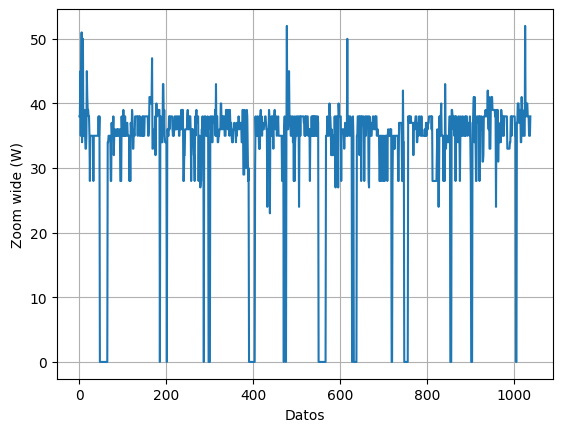

[114. 114.  45. ...  98.  98.  38.]


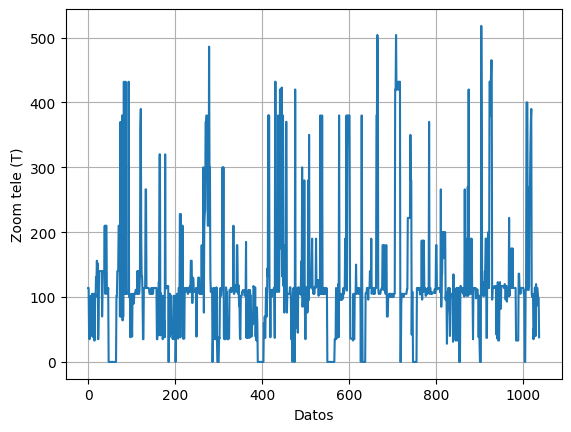

[70. 50.  0. ... 80. 80. 40.]


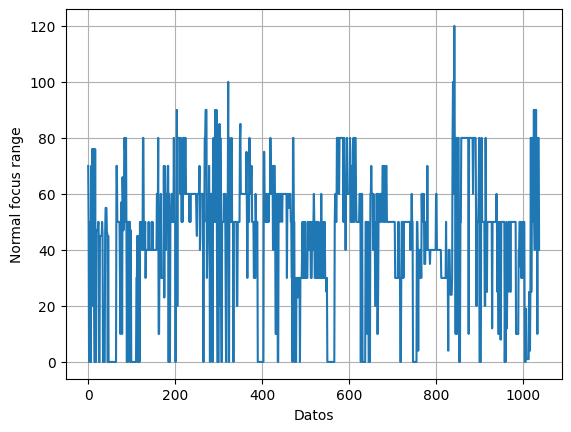

[40.  0.  0. ... 10. 10. 20.]


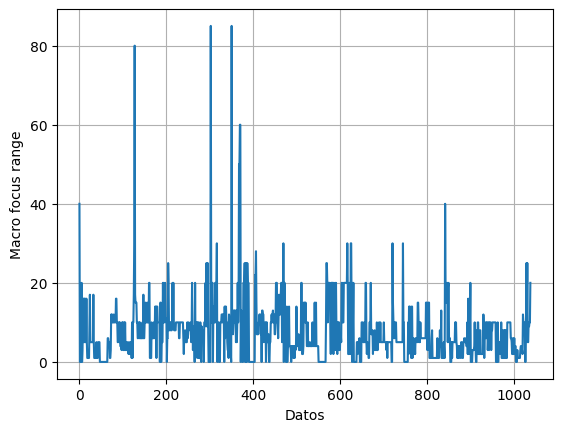

[ 4.  4.  2. ...  8. 16.  8.]


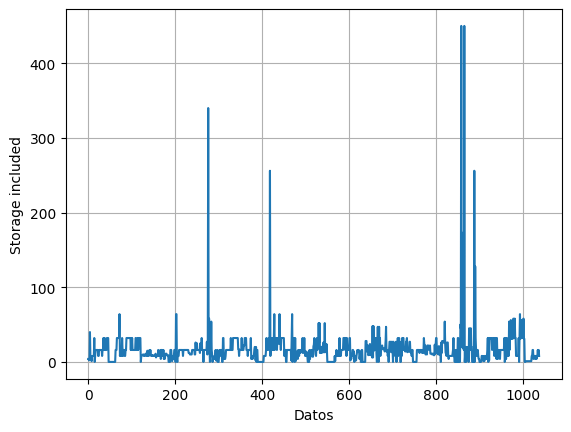

[420. 420.   0. ... 340. 340. 180.]


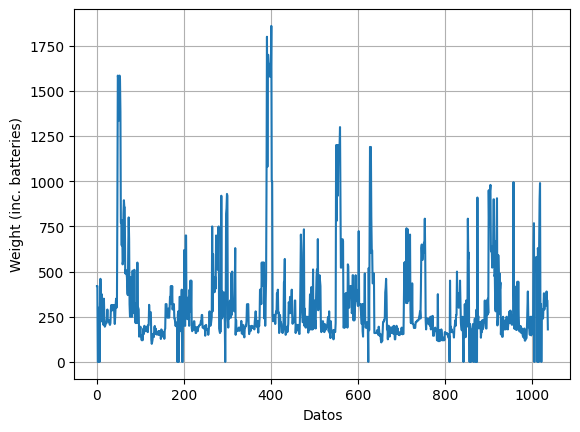

[ 95. 158.   0. ... 107. 107.  86.]


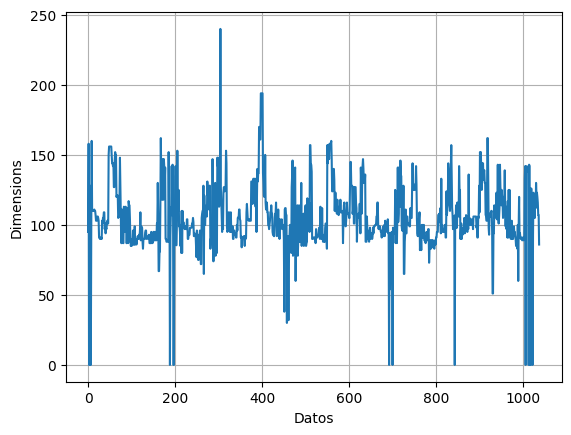

[179. 179. 179. ...  62.  62. 129.]


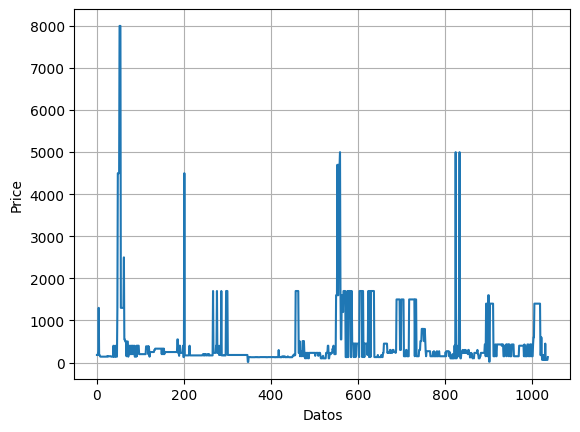

In [195]:
showDataSet(headers, data_numpy)

## Algoritmo 4: StandarScaler

Para que nuestros datos sean correctamente procesados, debemos asegurarnos que estos tengan una distribución estandar.

Este algoritmo afectara a las columnas de OneHotEncoder, asi que lo modificamos. Crearemos una función que solo modifique las primeras 12 columnas de valores continuos (osea, la que no se generaron con OneHotEncoder)

In [196]:
def setContinuosColumns(data, continuosValue):
    data=data[:,12:]
    data_numpy=np.concatenate((continuosValue, data), axis=1)
    print(data_numpy.shape)
    return data_numpy

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_numpy[:,0:12])
data_numpy_scaler=scaler.transform(data_numpy[:,0:12])
print('El escalado es:')
print(data_numpy_scaler)
print('\nEl datasset quedara como: ')
data_numpy=setContinuosColumns(data_numpy, data_numpy_scaler)
print(data_numpy)

El escalado es:
[[-2.41993726 -1.91092262 -1.36536986 ...  0.38739061 -0.42775122
  -0.36625356]
 [-2.05275485 -1.57370233 -1.36536986 ...  0.38739061  2.17258097
  -0.36625356]
 [-1.31839003 -2.41675306 -2.13599218 ... -1.22778558 -4.34888706
  -0.36625356]
 ...
 [-0.95120762 -0.56204144 -0.90299647 ...  0.079738    0.06755015
  -0.5201834 ]
 [-0.95120762 -0.09836353 -0.69107533 ...  0.079738    0.06755015
  -0.5201834 ]
 [-0.5840252  -1.15217696 -1.17271428 ... -0.53556721 -0.79922725
  -0.43203554]]

El datasset quedara como: 
(1038, 1050)
[[-2.41993726 -1.91092262 -1.36536986 ...  0.          0.
   0.        ]
 [-2.05275485 -1.57370233 -1.36536986 ...  0.          0.
   0.        ]
 [-1.31839003 -2.41675306 -2.13599218 ...  0.          0.
   0.        ]
 ...
 [-0.95120762 -0.56204144 -0.90299647 ...  1.          0.
   0.        ]
 [-0.95120762 -0.09836353 -0.69107533 ...  0.          1.
   0.        ]
 [-0.5840252  -1.15217696 -1.17271428 ...  0.          0.
   1.        ]]


[-2.41993726 -2.05275485 -1.31839003 ... -0.95120762 -0.95120762
 -0.5840252 ]


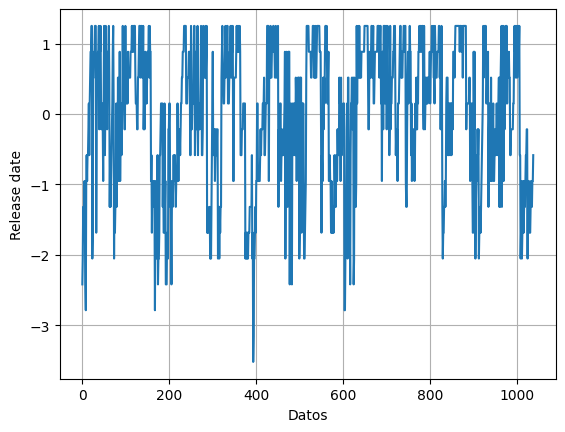

[-1.91092262 -1.57370233 -2.41675306 ... -0.56204144 -0.09836353
 -1.15217696]


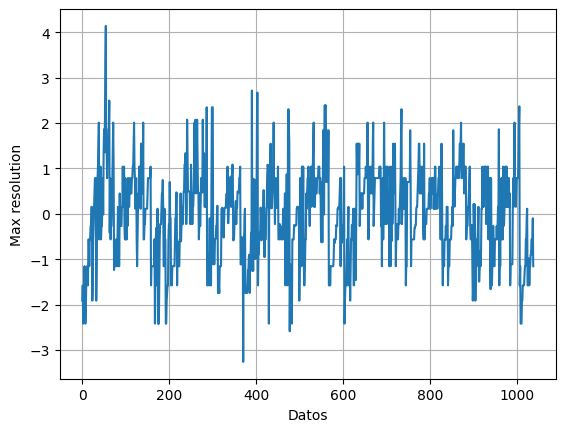

[-1.36536986 -1.36536986 -2.13599218 ... -0.90299647 -0.69107533
 -1.17271428]


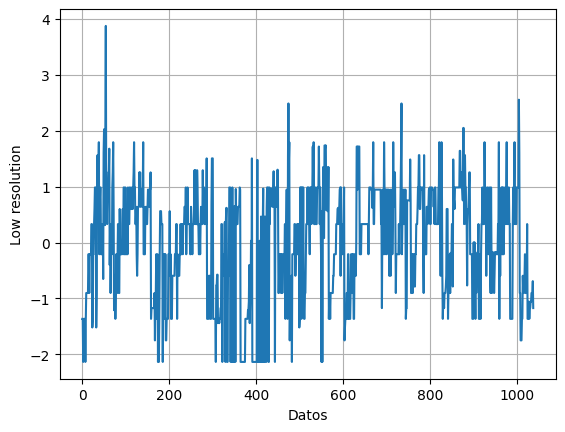

[-1.61690683 -1.26512538 -1.61690683 ... -0.56156249 -0.56156249
 -1.26512538]


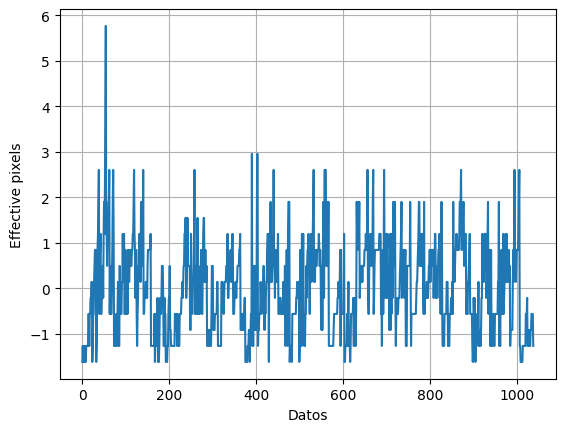

[0.48765741 0.48765741 1.16541539 ... 0.1971897  0.1971897  0.48765741]


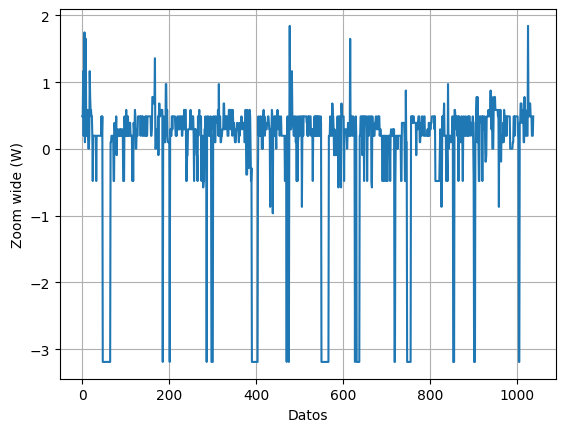

[-0.080559   -0.080559   -0.81923483 ... -0.25184615 -0.25184615
 -0.89417295]


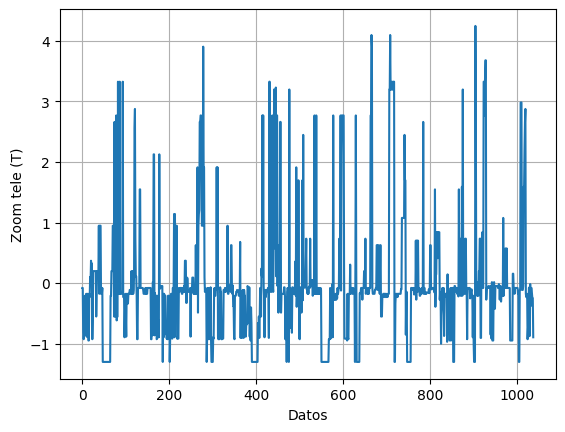

[ 1.0714537   0.24262116 -1.82946018 ...  1.48586997  1.48586997
 -0.17179511]


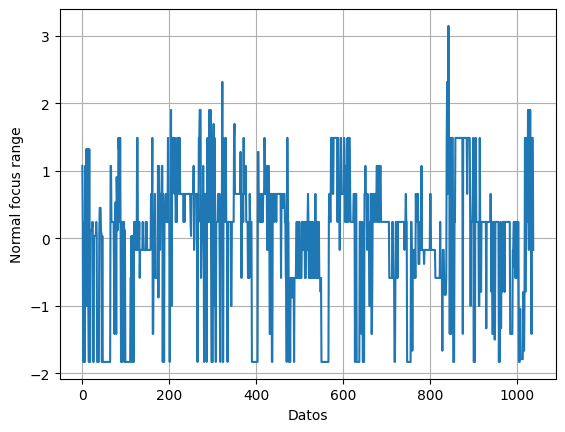

[ 3.98060544 -0.96238084 -0.96238084 ...  0.27336573  0.27336573
  1.5091123 ]


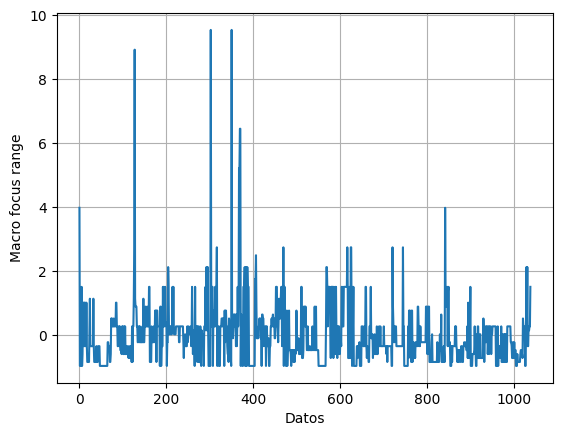

[-0.490781   -0.490781   -0.56377111 ... -0.34480077 -0.05284033
 -0.34480077]


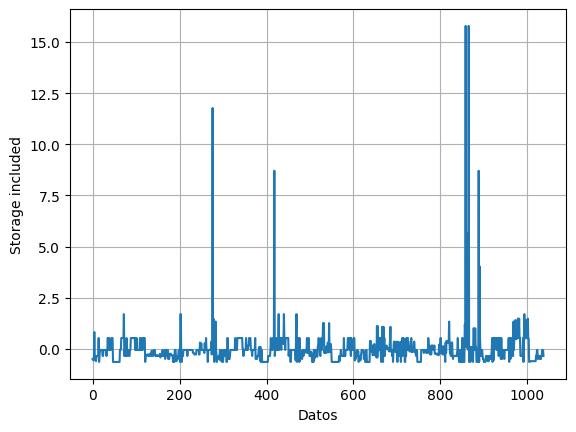

[ 0.38739061  0.38739061 -1.22778558 ...  0.079738    0.079738
 -0.53556721]


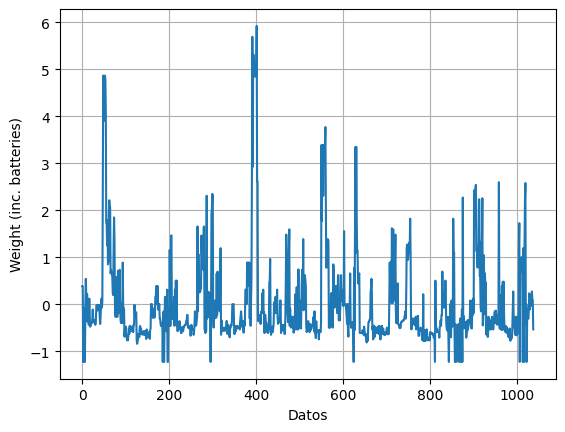

[-0.42775122  2.17258097 -4.34888706 ...  0.06755015  0.06755015
 -0.79922725]


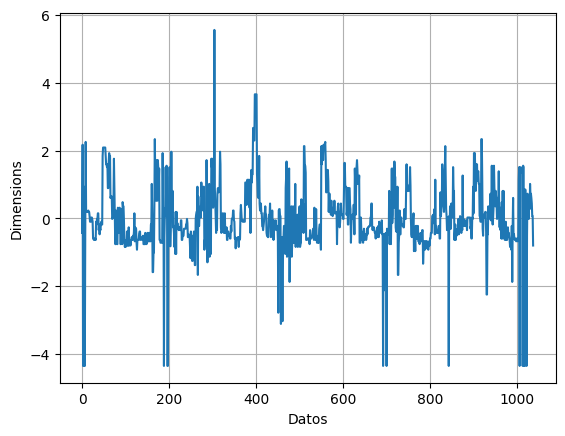

[-0.36625356 -0.36625356 -0.36625356 ... -0.5201834  -0.5201834
 -0.43203554]


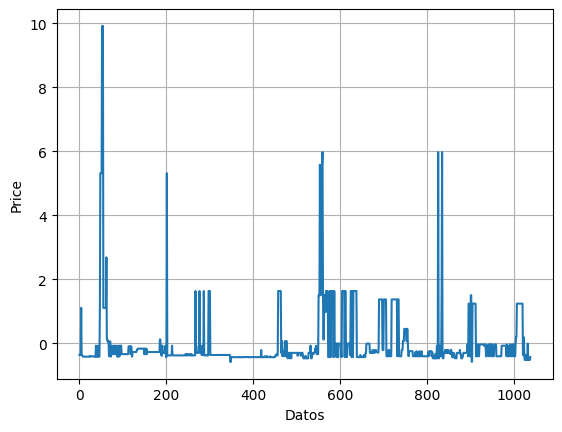

In [198]:
showDataSet(headers, data_numpy)

## Algoritmo 5: Normalize

Ahora normalizaremos nuestros datos para que tengan una norma unitaria (misma escala)

In [199]:
from sklearn.preprocessing import normalize
data_numpy_normalize =    normalize(data_numpy, norm='l2')
print(data_numpy_normalize)
data_numpy_normalize = normalize(data_numpy[:,0:12], norm='l2')
print('La normalización es:')
print(data_numpy_normalize)
print('\nEl dataset quedaria como:')
np.set_printoptions(suppress=True)
data_numpy=setContinuosColumns(data_numpy, data_numpy_normalize)
print(data_numpy)

[[-0.42169217 -0.33299256 -0.23792591 ...  0.          0.
   0.        ]
 [-0.48889464 -0.37480103 -0.3251835  ...  0.          0.
   0.        ]
 [-0.20121552 -0.36885005 -0.32599972 ...  0.          0.
   0.        ]
 ...
 [-0.38397967 -0.22688263 -0.36451799 ...  0.40367599  0.
   0.        ]
 [-0.41022584 -0.04242109 -0.29803899 ...  0.          0.43126845
   0.        ]
 [-0.18268793 -0.36041051 -0.36683475 ...  0.          0.
   0.3128083 ]]
La normalización es:
[[-0.42824426 -0.33816647 -0.24162271 ...  0.06855459 -0.075697
  -0.06481407]
 [-0.50337955 -0.38590559 -0.334818   ...  0.09499649  0.53276349
  -0.08981323]
 [-0.20360078 -0.37322249 -0.3298642  ... -0.18960861 -0.6716046
  -0.05656104]
 ...
 [-0.41969486 -0.24798572 -0.39842299 ...  0.03518226  0.02980469
  -0.22951698]
 [-0.45468309 -0.04701837 -0.33033825 ...  0.03811526  0.03228939
  -0.24865086]
 [-0.19234028 -0.37945287 -0.38621654 ... -0.17638134 -0.26321397
  -0.14228468]]

El dataset quedaria como:
(1038, 1050

[-0.42824426 -0.50337955 -0.20360078 ... -0.41969486 -0.45468309
 -0.19234028]


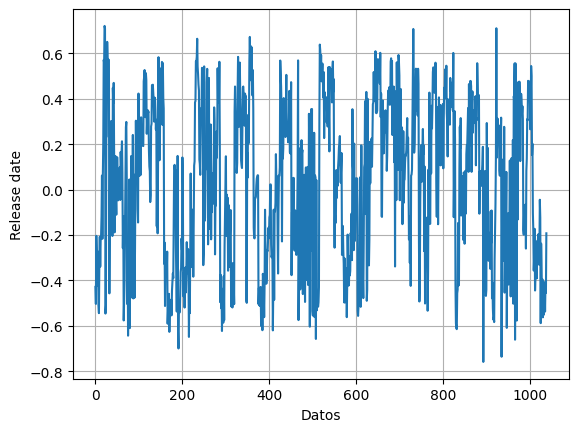

[-0.33816647 -0.38590559 -0.37322249 ... -0.24798572 -0.04701837
 -0.37945287]


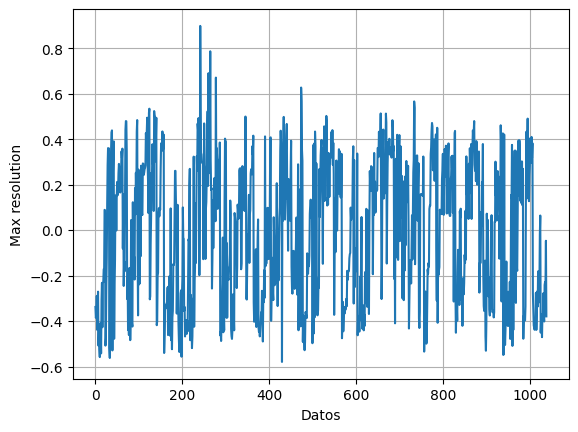

[-0.24162271 -0.334818   -0.3298642  ... -0.39842299 -0.33033825
 -0.38621654]


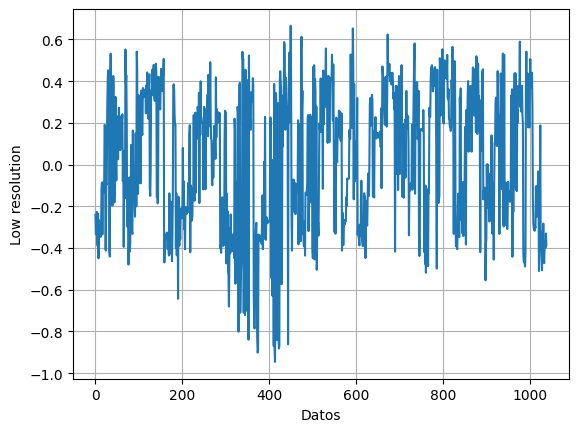

[-0.28613596 -0.3102359  -0.24970114 ... -0.24777439 -0.26843032
 -0.4166508 ]


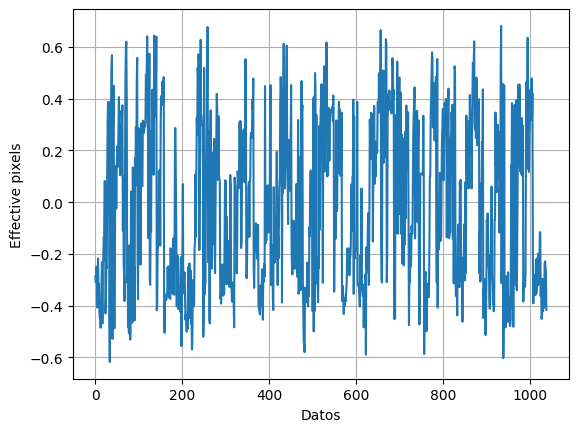

[0.0862983  0.11958406 0.1799767  ... 0.08700467 0.09425789 0.16060293]


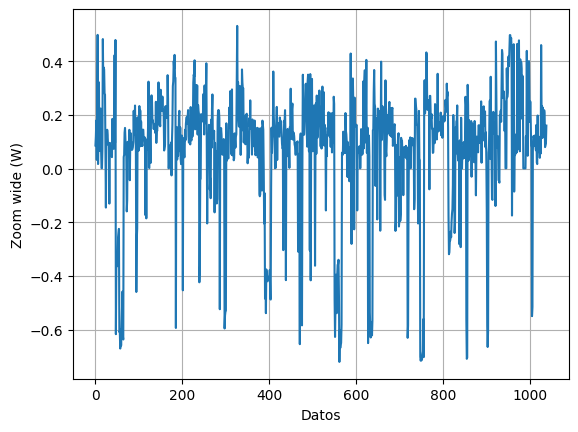

[-0.01425613 -0.0197548  -0.12651556 ... -0.11112036 -0.12038401
 -0.29448297]


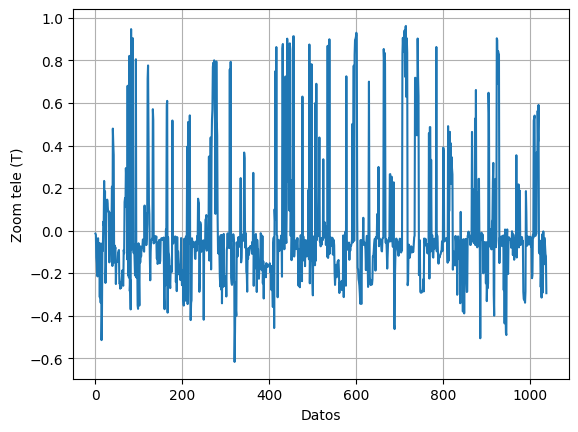

[ 0.18960983  0.05949592 -0.28252605 ...  0.65560029  0.71025498
 -0.05657824]


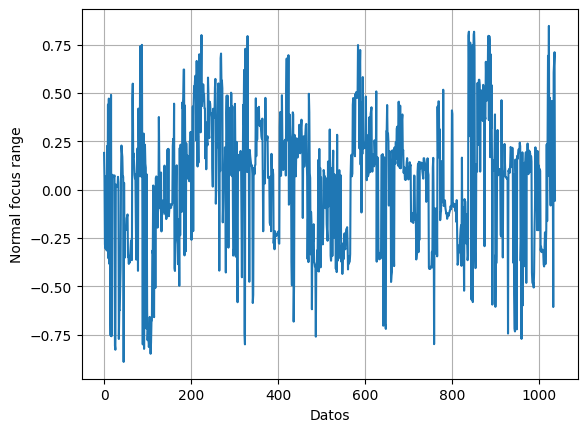

[ 0.70442794 -0.23599644 -0.14862179 ...  0.1206153   0.1306705
  0.49700437]


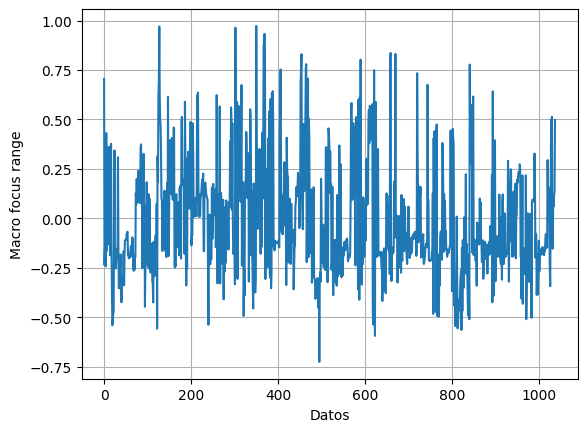

[-0.08685107 -0.12035003 -0.08706395 ... -0.1521341  -0.025258
 -0.11355516]


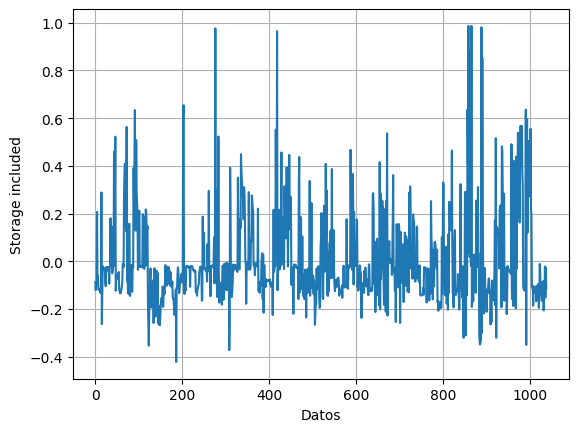

[ 0.06855459  0.09499649 -0.18960861 ...  0.03518226  0.03811526
 -0.17638134]


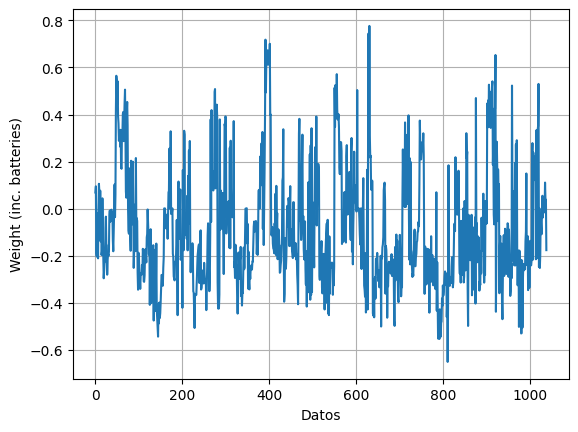

[-0.075697    0.53276349 -0.6716046  ...  0.02980469  0.03228939
 -0.26321397]


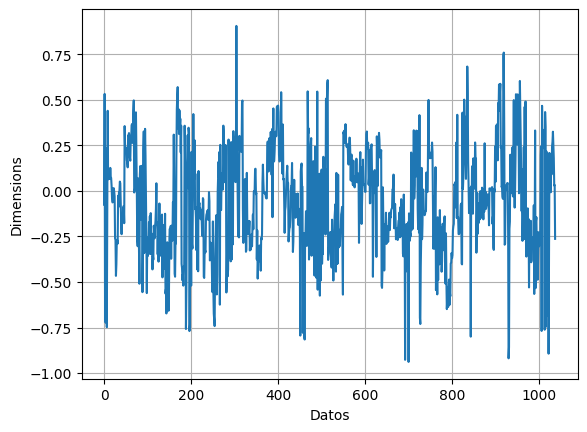

[-0.06481407 -0.08981323 -0.05656104 ... -0.22951698 -0.24865086
 -0.14228468]


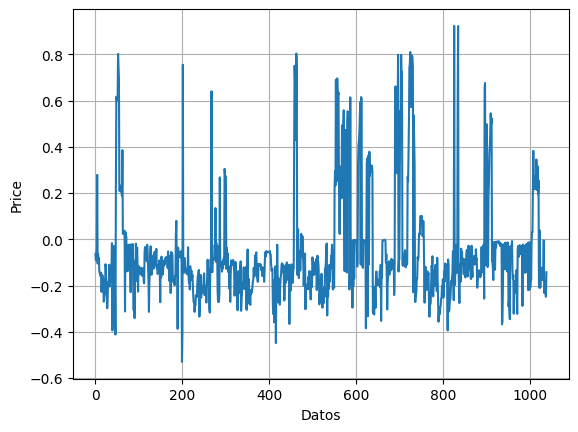

In [200]:
showDataSet(headers, data_numpy)

Fuentes:

[Introduction to data preprocessing](https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d)

[Preprocessing data: Scikit learn documantation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features)

[Data Preprocessing in Data Mining](https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/)

[Data Preprocessing Methods with Scikit-Learn — Python](https://medium.com/@chyun55555/data-preprocessing-methods-with-scikit-learn-python-98437e8d93cb)

[Label Encoding vs. One-Hot Encoding: Making Sense of Categorical Data](https://medium.com/aimonks/label-encoding-vs-one-hot-encoding-making-sense-of-categorical-data-1181914501f3)